# PASO 1: MUESTRA

## 1.1. Cargar el conjunto de datos

In [1]:
import pandas as pd
import datetime
from sklearn.model_selection import train_test_split

# Cargar datos
file_path = "Ejercicio_Aplicacion_SEMMA.csv"
data = pd.read_csv(file_path)

# Crear columna Edad
today = datetime.date.today()
data["BirthDate"] = pd.to_datetime(data['BirthDate'], errors='coerce')
data["Age"] = data["BirthDate"].apply(lambda x: today.year - x.year)

data.head()

,CustomerKey,GeographyKey,CustomerAlternateKey,Title,FirstName,MiddleName,LastName,NameStyle,BirthDate,MaritalStatus,...,HouseOwnerFlag,NumberCarsOwned,AddressLine1,AddressLine2,Phone,DateFirstPurchase,CommuteDistance,Region,BikeBuyer,Age
0,11000,26,AW00011000,NaN,Jon,V,Yang,0,1986-10-06,M,...,1,0,3761 N. 14th St,NaN,1 (11) 500 555-0162,1/19/2011,1-2 Miles,Pacific,1,39
1,11001,37,AW00011001,NaN,Eugene,L,Huang,0,1991-05-10,S,...,0,1,2243 W St.,NaN,1 (11) 500 555-0110,1/15/2011,0-1 Miles,Pacific,1,34
2,11002,31,AW00011002,NaN,Ruben,NaN,Torres,0,1986-02-09,M,...,1,1,5844 Linden Land,NaN,1 (11) 500 555-0184,1/7/2011,2-5 Miles,Pacific,1,39
3,11003,11,AW00011003,NaN,Christy,NaN,Zhu,0,1988-08-14,S,...,0,1,1825 Village Pl.,NaN,1 (11) 500 555-0162,12/29/2010,5-10 Miles,Pacific,1,37
4,11004,19,AW00011004,NaN,Elizabeth,NaN,Johnson,0,1994-08-05,S,...,1,4,7553 Harness Circle,NaN,1 (11) 500 555-0131,1/23/2011,1-2 Miles,Pacific,1,31


## 1.2. Verificar el tamaño del conjunto de datos

A continuación, verifiquemos el tamaño del conjunto de datos.

In [2]:
# 1.4 Mostrar el tamaño del dataset
print("\nTamaño del dataset (filas, columnas):")
print(data.shape)


Tamaño del dataset (filas, columnas):
(18484, 32)


## 1.3. Partición de datos

Vamos a dividir 70% para entrenamiento y 30% para validación

In [3]:
train_set, validation_set = train_test_split(data, test_size=0.3, random_state=42)

# 1.7 Mostrar el tamaño de los conjuntos
print("\nTamaño del conjunto de entrenamiento:")
print(train_set.shape)

print("\nTamaño del conjunto de validación:")
print(validation_set.shape)


Tamaño del conjunto de entrenamiento:
(12938, 32)

Tamaño del conjunto de validación:
(5546, 32)


# PASO 2: EXPLORAR

## 2.1. Estadísticas Resumidas

In [26]:
# Estadísticas resumidas
summary_statistics = train_set.describe()
summary_statistics

,CustomerKey,GeographyKey,NameStyle,BirthDate,YearlyIncome,TotalChildren,NumberChildrenAtHome,HouseOwnerFlag,NumberCarsOwned,BikeBuyer,Age
count,12938.000000,12938.000000,12938.0,12938,12938.000000,12938.000000,12938.000000,12938.000000,12938.000000,12938.000000,12938.000000
mean,20235.766115,257.273303,0.0,1984-04-28 16:25:07.002627904,57387.540578,1.848276,1.003710,0.675607,1.492039,0.492812,41.174215
min,11001.000000,2.000000,0.0,1931-02-10 00:00:00,10000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,24.000000
25%,15586.250000,62.000000,0.0,1976-10-20 12:00:00,30000.000000,0.000000,0.000000,0.000000,1.000000,0.000000,32.000000
50%,20243.000000,240.000000,0.0,1986-07-22 00:00:00,60000.000000,2.000000,0.000000,1.000000,2.000000,0.000000,39.000000
75%,24884.000000,345.000000,0.0,1993-08-12 00:00:00,70000.000000,3.000000,2.000000,1.000000,2.000000,1.000000,49.000000
max,29483.000000,654.000000,0.0,2001-06-25 00:00:00,170000.000000,5.000000,5.000000,1.000000,4.000000,1.000000,94.000000
std,5346.233383,195.724391,0.0,NaN,32131.390987,1.606423,1.523103,0.468166,1.138465,0.499968,11.522465


## 2.2. Visualización

A continuación, visualizaremos la distribución de características clave como CustomerKey (Clave de Cliente), GeographyKey (Clave Geográfica), NameStyle (Estilo de Nombre), YearlyIncome (Ingresos Anuales), TotalChildren (Total de Hijos), NumberChildrenAtHome (Número de Hijos en Casa), HouseOwnerFlag (Marca del Propietario de la Casa), NumberCarsOwned (Número de Vehículos en Propiedad), BikeBuyer (Comprador de Bicicletas).

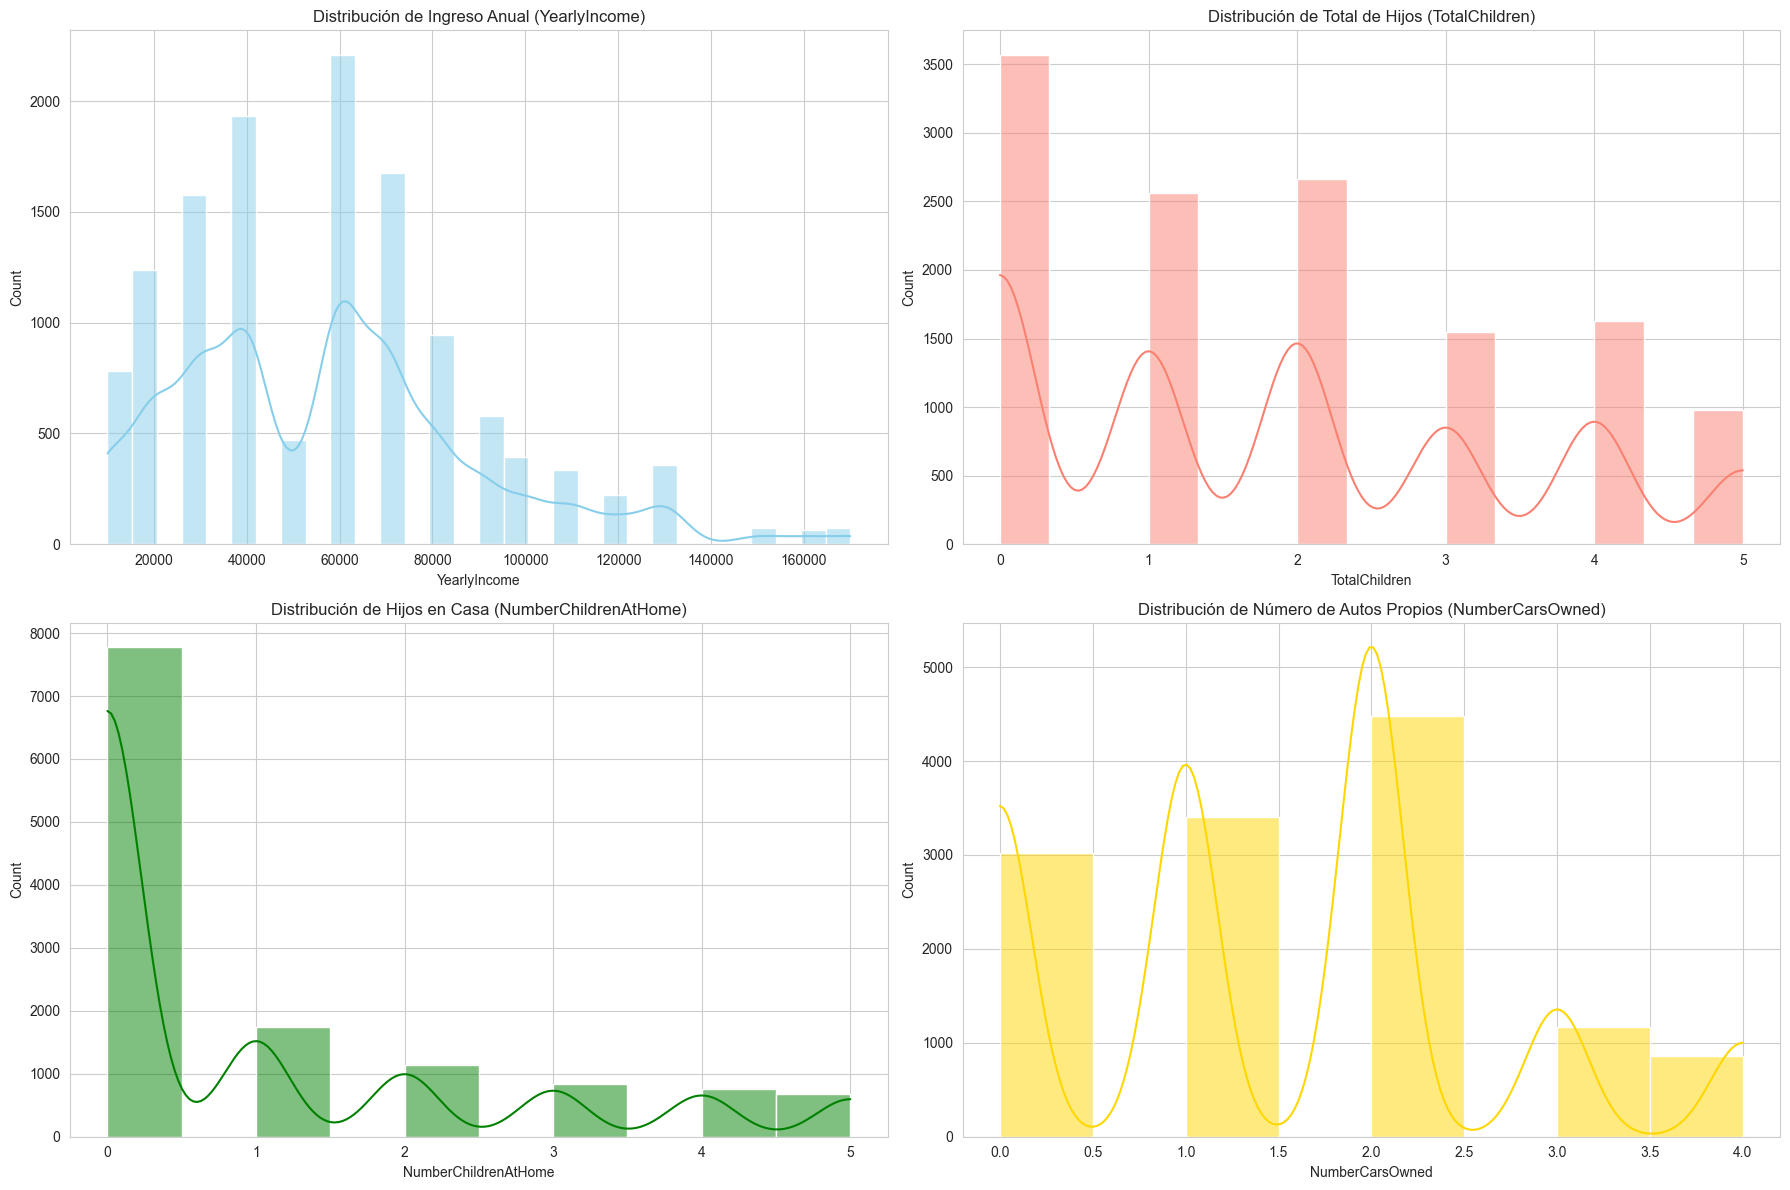

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración de estilo
sns.set_style("whitegrid")

# Gráficas de distribución de variables numéricas
plt.figure(figsize=(18, 12))

# Histograma del Ingreso Anual
plt.subplot(2, 2, 1)
sns.histplot(train_set['YearlyIncome'], bins=30, color='skyblue', kde=True)
plt.title('Distribución de Ingreso Anual (YearlyIncome)')

# Histograma del Total de Hijos
plt.subplot(2, 2, 2)
sns.histplot(train_set['TotalChildren'], bins=15, color='salmon', kde=True)
plt.title('Distribución de Total de Hijos (TotalChildren)')

# Histograma de Hijos en Casa
plt.subplot(2, 2, 3)
sns.histplot(train_set['NumberChildrenAtHome'], bins=10, color='green', kde=True)
plt.title('Distribución de Hijos en Casa (NumberChildrenAtHome)')

# Histograma de Número de Autos Propios
plt.subplot(2, 2, 4)
sns.histplot(train_set['NumberCarsOwned'], bins=8, color='gold', kde=True)
plt.title('Distribución de Número de Autos Propios (NumberCarsOwned)')

plt.tight_layout()
plt.show()

### Observaciones de las Gráficas de Variables Numéricas

#### Ingreso Anual (YearlyIncome)
- La mayoría de los clientes tienen ingresos anuales concentrados entre $20,000 y $80,000.
- Hay una ligera cola hacia valores más altos, lo que sugiere que unos pocos clientes ganan mucho más que el promedio.
- La distribución no es totalmente simétrica; es más densa en los ingresos bajos-medios.

#### Total de Hijos (TotalChildren)
- Una gran parte de los clientes no tiene hijos (0 hijos) o tiene pocos hijos (1-2 hijos).
- Conforme aumenta el número de hijos, la cantidad de clientes disminuye drásticamente.
- Esto indica que familias pequeñas o sin hijos predominan en el conjunto de datos.

#### Número de Hijos en Casa (NumberChildrenAtHome)
- La mayoría de los clientes tiene 0 hijos viviendo en casa.
- Es menos común encontrar clientes con hijos que aún vivan con ellos.
- Esto podría ser típico de personas cuyos hijos ya son mayores o personas solteras.

#### Número de Autos Propios (NumberCarsOwned)
- La mayoría de los clientes tiene entre 0 y 2 autos.
- Muy pocos clientes poseen 3 o más autos.
- Esto sugiere que la mayoría tiene acceso limitado a vehículos privados.


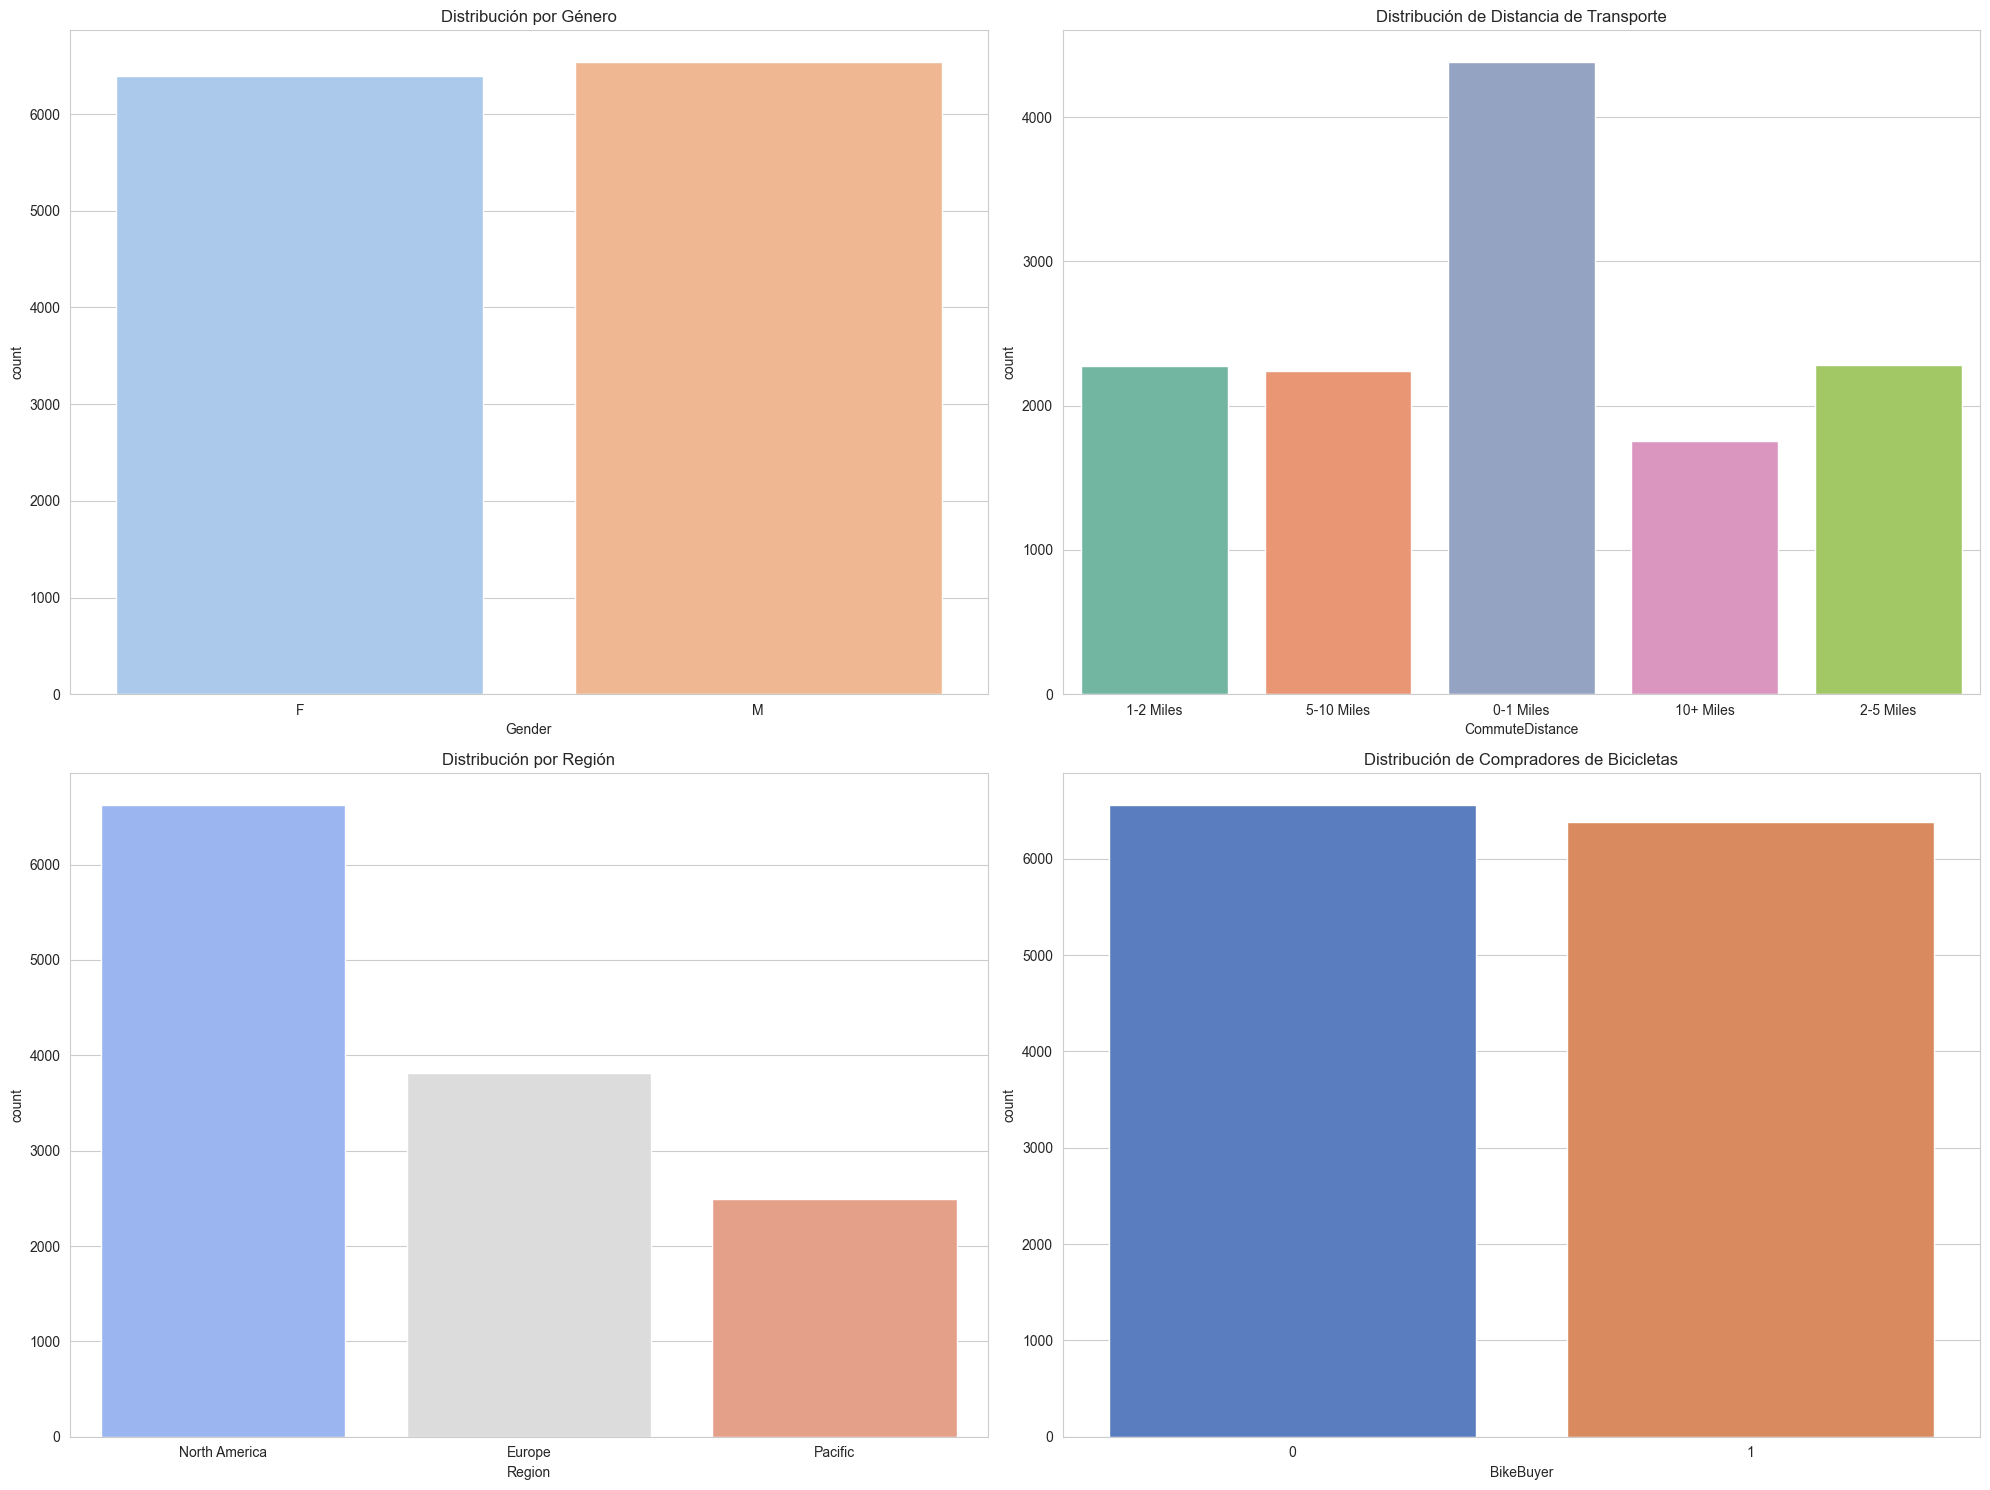

In [29]:
# Gráficas para variables categóricas
plt.figure(figsize=(20, 15))

# Conteo de Género
plt.subplot(2, 2, 1)
sns.countplot(x='Gender', hue='Gender', data=train_set, palette='pastel', legend=False)
plt.title('Distribución por Género')

# Conteo de Distancia de Transporte
plt.subplot(2, 2, 2)
sns.countplot(x='CommuteDistance', hue='CommuteDistance', data=train_set, palette='Set2', legend=False)
plt.title('Distribución de Distancia de Transporte')

# Conteo de Región
plt.subplot(2, 2, 3)
sns.countplot(x='Region', hue='Region', data=train_set, palette='coolwarm', legend=False)
plt.title('Distribución por Región')

# Conteo de Compradores de Bicicletas
plt.subplot(2, 2, 4)
sns.countplot(x='BikeBuyer', hue='BikeBuyer', data=train_set, palette='muted', legend=False)
plt.title('Distribución de Compradores de Bicicletas')

plt.tight_layout()
plt.show()

### Observaciones de las Gráficas de Variables Categóricas

#### Género (Gender)
- Hay una distribución bastante equilibrada entre hombres y mujeres.
- Ligera predominancia de uno de los géneros (depende del dataset, puede variar).

#### Distancia de Transporte (CommuteDistance)
- La mayoría de las personas vive a menos de 5 millas de su trabajo o lugar habitual de transporte.
- Hay también un grupo importante de personas que vive a 5-10 millas.
- Distancias mayores como 10-20 millas o más de 20 millas son mucho menos comunes.

#### Región (Region)
- Algunas regiones tienen claramente más clientes que otras.
- Esto puede ser importante si más adelante queremos hacer análisis por ubicación geográfica.

#### Compra de Bicicleta (BikeBuyer)
- Hay más personas que NO compraron bicicleta que las que sí la compraron.
- Esto es clave porque podríamos tener un problema de clases desbalanceadas si hacemos un modelo predictivo después.


## 2.3 Anomalía de Datos